# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_with_nans.csv")
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [4]:
df.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [5]:
df.drop(labels = [df.columns[0], 'Id' ] ,axis = 1 , inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


In [6]:
df.groupby("Species").agg(['min' , 'max' , 'mean' , 'std' ])

SepalLengthCm                          SepalWidthCm       \
                          min  max      mean       std          min  max   
Species                                                                    
Iris-setosa               4.3  6.9  5.034483  0.429014          2.3  4.4   
Iris-versicolor           4.9  7.0  5.932075  0.516189          2.0  4.4   
Iris-virginica            4.9  7.9  6.546429  0.650025          2.2  3.9   

                                    PetalLengthCm                           \
                     mean       std           min  max      mean       std   
Species                                                                      
Iris-setosa      3.389831  0.390709           1.0  5.4  1.572414  0.639570   
Iris-versicolor  2.805556  0.382355           1.5  5.1  4.190385  0.623167   
Iris-virginica   2.996429  0.355203           1.3  6.9  5.469643  0.795195   

                PetalWidthCm                           
                         min  max      mean       std  
Species                                                
Iris-setosa              0.1  2.1  0.300000  0.295950  
Iris-versicolor          0.4  1.8  1.314815  0.235049  
Iris-virginica           0.4  2.5  1.992727  0.353215

In [7]:
df[df["Species"] == 'Iris-setosa']['SepalLengthCm'].mean()

5.0344827586206895

In [8]:
df.isna().sum()

SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [9]:
df[df['SepalLengthCm'].isna()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,NaN,3.7,1.5,0.4,Iris-setosa
59,NaN,2.3,1.3,0.3,Iris-setosa
109,NaN,2.9,4.5,1.5,Iris-versicolor


In [10]:
iris_setosa_sepalLen_mean = df[df["Species"] == 'Iris-setosa']['SepalLengthCm'].mean()
iris_versicolor_sepalLen_mean = df[df["Species"] == 'Iris-versicolor']['SepalLengthCm'].mean()

In [11]:
df[(df['Species'] == 'Iris-setosa') & (df["SepalLengthCm"].isna())] = df[(df['Species'] == 'Iris-setosa') & (df["SepalLengthCm"].isna())].fillna(iris_setosa_sepalLen_mean)
df[(df['Species'] == 'Iris-versicolor') & (df["SepalLengthCm"].isna())] = df[(df['Species'] == 'Iris-versicolor') & (df["SepalLengthCm"].isna())].fillna(iris_versicolor_sepalLen_mean)

In [12]:
df[df['SepalWidthCm'].isna()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
53,4.6,NaN,1.4,0.3,Iris-setosa


In [13]:
iris_setosa_sepalWidth_mean = df[df["Species"] == 'Iris-setosa']['SepalWidthCm'].mean()

In [14]:
df[(df['Species'] == 'Iris-setosa') & (df["SepalWidthCm"].isna())] = df[(df['Species'] == 'Iris-setosa') & (df["SepalWidthCm"].isna())].fillna(iris_setosa_sepalWidth_mean)

In [15]:
df[df['PetalLengthCm'].isna()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,5.1,3.8,NaN,0.2,Iris-setosa
52,5.3,3.7,NaN,0.2,Iris-setosa
98,6.3,3.3,NaN,1.6,Iris-versicolor
113,6.1,2.9,NaN,1.4,Iris-versicolor


In [16]:
iris_setosa_PetalLen_mean = df[df["Species"] == 'Iris-setosa']['PetalLengthCm'].mean()
iris_versicolor_PetalLen_mean = df[df["Species"] == 'Iris-versicolor']['PetalLengthCm'].mean()

In [17]:
df[(df['Species'] == 'Iris-setosa') & (df["PetalLengthCm"].isna())] = df[(df['Species'] == 'Iris-setosa') & (df["PetalLengthCm"].isna())].fillna(iris_setosa_PetalLen_mean)
df[(df['Species'] == 'Iris-versicolor') & (df["PetalLengthCm"].isna())] = df[(df['Species'] == 'Iris-versicolor') & (df["PetalLengthCm"].isna())].fillna(iris_versicolor_PetalLen_mean)

In [18]:
df[df['PetalWidthCm'].isna()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
54,4.4,3.0,1.3,NaN,Iris-setosa
160,5.8,2.8,5.1,NaN,Iris-virginica


In [19]:
iris_setosa_PetalWidth_mean = df[df["Species"] == 'Iris-setosa']['PetalWidthCm'].mean()
iris_virginica_PetalWidth_mean = df[df["Species"] == 'Iris-virginica']['PetalWidthCm'].mean()

In [20]:
df[(df['Species'] == 'Iris-setosa') & (df["PetalWidthCm"].isna())] = df[(df['Species'] == 'Iris-setosa') & (df["PetalWidthCm"].isna())].fillna(iris_setosa_PetalWidth_mean)
df[(df['Species'] == 'Iris-virginica') & (df["PetalWidthCm"].isna())] = df[(df['Species'] == 'Iris-virginica') & (df["PetalWidthCm"].isna())].fillna(iris_virginica_PetalWidth_mean)

In [21]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
# for column in df.columns[:-1]:
#     df[column].fillna(df[column].mean() , inplace=True) 

# Easy but not effective way for this classification.

# Data Visulization

In [23]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


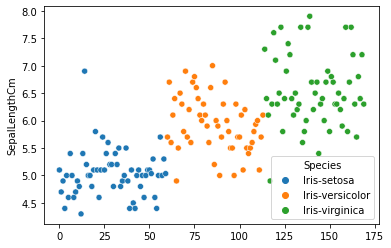

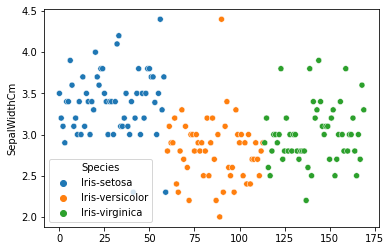

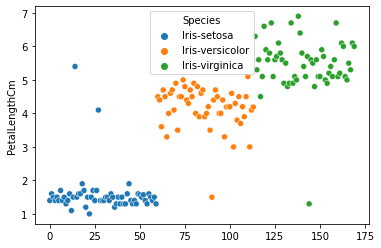

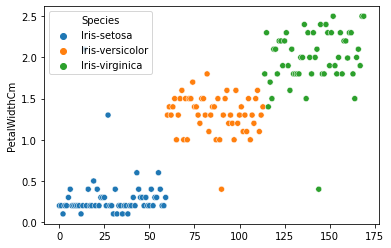

In [24]:
for column in df.columns[:-1]:
    sns.scatterplot(x = df.index , y = df[column] , hue = df['Species']);
    plt.show()

# Outlier Detection

## 1.Way : 3 Sigma Outlier Detection

In [25]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


In [26]:
selected_spec = df[df['Species'] == 'Iris-setosa']
selected_column = selected_spec['SepalLengthCm']

std = selected_column.std()
avg = selected_column.mean()

In [27]:
max = avg + (3*std)
min = avg - (3*std)

In [28]:
selected_column[(selected_spec['SepalLengthCm'] > max) | (selected_spec['SepalLengthCm'] < min)].index

Int64Index([14], dtype='int64')

In [29]:
# For loop : 

In [30]:
for column in df.columns[:-1]:
    for spec in df.Species.unique():
        selected_spec = df[df['Species'] == spec]
        selected_column = selected_spec[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        max = avg + (3*std)
        min = avg - (3*std)
        
        outlier_indexes = selected_column[(selected_spec[column] > max) | (selected_spec[column] < min)].index
        df.drop(index = outlier_indexes , inplace=True)

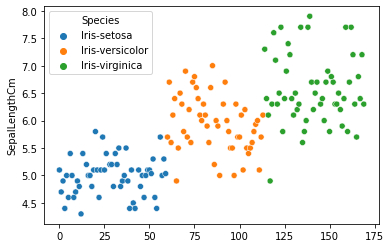

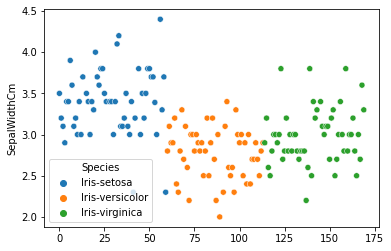

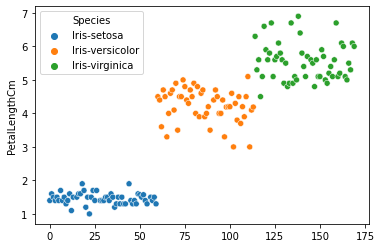

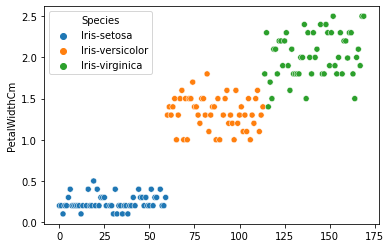

In [31]:
for column in df.columns[:-1]:
    sns.scatterplot(x = df.index , y = df[column] , hue = df['Species']);
    plt.show()

## 2.Way : IQR - Quantile outlier detection

In [32]:
for column in df.columns[:-1]:
    for spec in df['Species'].unique():
        selected_spec = df[df['Species'] == spec]
        selected_column = selected_spec[column]
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        iqr = q3 - q1
        
        max = q3 + iqr * 1.5
        min = q1 - iqr * 1.5
        
        outliers = df[(df['Species'] == spec) & ((df[column] > max)  | (df[column] < min) )].index
        
        df.drop(outliers , inplace=True)

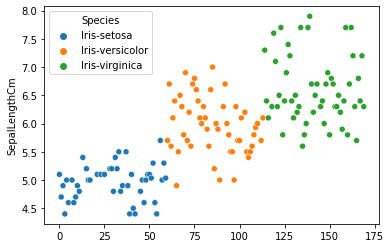

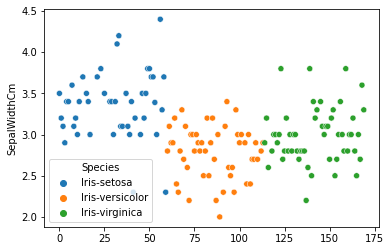

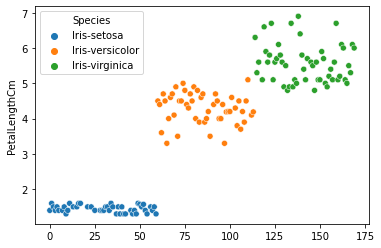

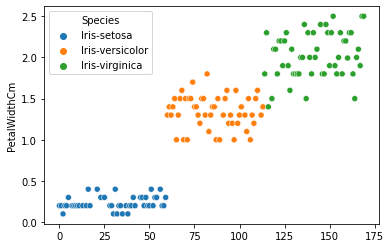

In [33]:
for column in df.columns[:-1]:
    sns.scatterplot(x = df.index , y = df[column] , hue = df['Species']);
    plt.show()

In [34]:
df.to_csv('Final_Irıs_data.csv')

# Modeling

In [35]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.9,3.1,1.5,0.1,Iris-setosa
3,4.4,2.9,1.4,0.2,Iris-setosa
4,5.0,3.4,1.5,0.2,Iris-setosa


In [36]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [37]:
encoder = LabelEncoder()

In [38]:
#encoder = OneHotEncoder()

# oneHotSpecies_df = pd.get_dummies(df['Species']) # For OneHotEncoder
# df = pd.concat([df,oneHotSpecies_df] , axis = 1).drop('Species' , axis = 1)

In [39]:
df['Species'] = encoder.fit_transform(df['Species'])

In [40]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.9,3.1,1.5,0.1,0
3,4.4,2.9,1.4,0.2,0
4,5.0,3.4,1.5,0.2,0


# Train | Test Split

In [41]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 169
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  151 non-null    float64
 1   SepalWidthCm   151 non-null    float64
 2   PetalLengthCm  151 non-null    float64
 3   PetalWidthCm   151 non-null    float64
 4   Species        151 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.5 KB


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop(columns = 'Species')
y = df['Species']

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state=53)

In [48]:
y_train.value_counts()

2    43
1    40
0    37
Name: Species, dtype: int64

In [49]:
y_test.value_counts()

2    11
1    11
0     9
Name: Species, dtype: int64

## Model Creating

In [52]:
import xgboost as xgb

In [53]:
xgb_cls = xgb.XGBClassifier(objective = 'multiclass:softmax' , num_class = 3)

In [54]:
xgb_cls.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [56]:
y_pred = xgb_cls.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [62]:
score = accuracy_score(y_test , y_pred)
score

0.9354838709677419

In [63]:
confusion_matrix(y_test , y_pred)

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 10]], dtype=int64)

In [ ]:
# Done for now !